### An aside: controlling reproducibility.

Recall that the weights of a neural network are initialised randomly.
In order to get reproducible results, we need to set random seeds so the weights are always initialised to the same random values. We need to set a specific 'enviornment variable' too, so that we can ensure that Tensorlow undetakes deterministic operations.  Regardless, if reporting results for an experiment, you may wish to not set the random seeds, and instead run your model N times and report the mean and standard deviation of the results. That is good scientific practice.


### Another aside: AI moves fast.
In the time since I wrote this notebook 'keras' has been absorbed by 'tensorflow' as so anytime we want to use keras we have to import via 'tensorflow'.
For example, anything that was `'from keras import'` should now be `'from tensorflow.keras import'.`

In [ ]:
from numpy.random import seed
seed(0)
from tensorflow.random import set_seed
set_seed(0)
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

## The Fashion MNIST dataset.
This dataset cosnsists of 70000 images of clothes, provided by Zalando Research. Each image is a 28x28 pixel image from one of ten classes.
The ten classes are:
* class label
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot


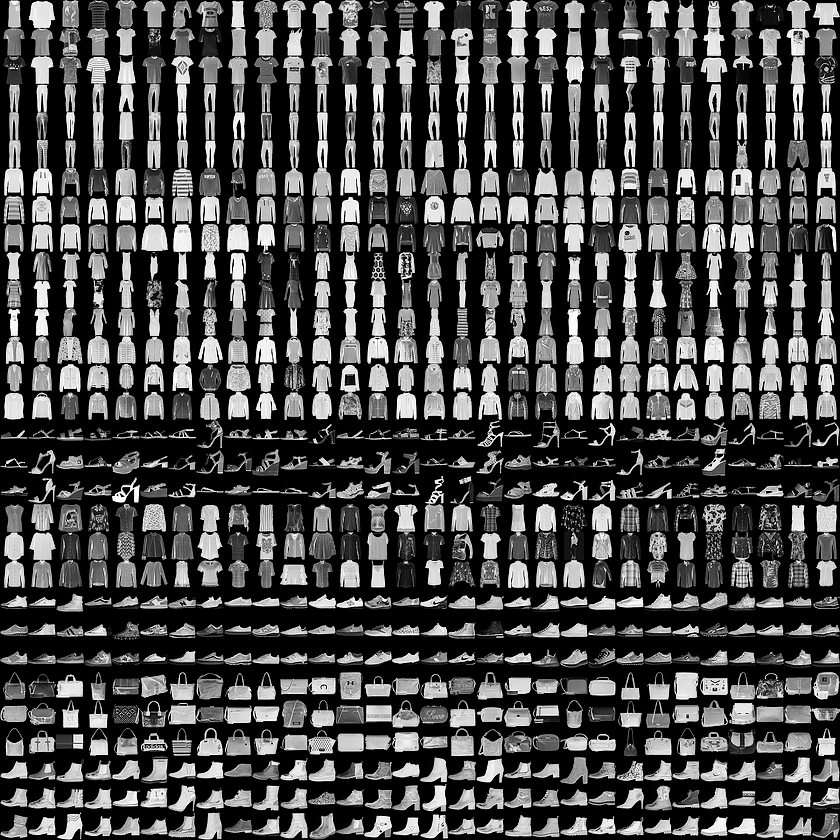

## Downloading the data
Access to this dataset is included in the Keras library, so we can download and load it as follows. Note that it returns a train/test split for us automatically.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Data exploration
In the next cell we have a look at the shape of our data. 

The first observation to note is that the shape of the training data is (60000, 28, 28). The 60000 corresponds to the number of data points/images we have. The two 28s correspond to the height and width of each image. If this was a colour image, there would be a 4th dimension that represents the image channel. For a typical colour image this would be 3, one for each of the RGB pixel values. However, as this is grayscale, only one pixel is needed to encode the colour of each image, and thus the number of channels is 1 (and thus omitted).

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
import numpy as np
# let's store the number of classes in a variable, we'll need this later for the output layer of the neural network.
num_classes = len(np.unique(y_train))
print('num classes:', num_classes)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
num classes: 10


##  Visualizse an example from each class.
In the next cell we find, for each class, an example of an image and visualise it. 

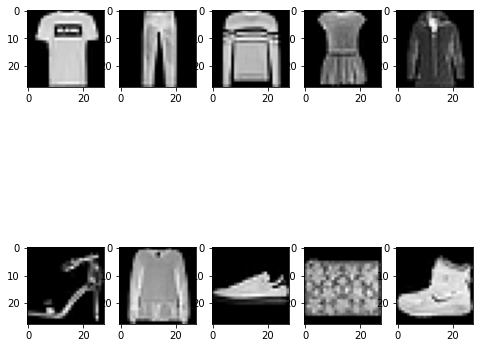

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

for i in range(num_classes):
  fig.add_subplot(2, 5, i+1)

  idx = np.where(y_train==i)[0]
  im = x_train[idx][0]

  plt.imshow(im, plt.get_cmap('gray'))

# Image classification using a fully connected neural network
The first approach that we try is to perform image classification using a fully connected neural network. This is the same type of network that we used previously to classify the measurements of our flowers into species/classes.

However, as noted above, each image is a 28x28 matrix. As it is an image, we expect it to be naturally represented as a matrix and not a vector. However, our fully connected deep neural network from before only processes vectors. Therefore, we will 'flatten' our 2D image matrix into a 1D vector.

In [ ]:
print('x_train shape:', x_train.shape)

x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_flat = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('x_train_flat shape:', x_train_flat.shape)




x_train shape: (60000, 28, 28)
x_train_flat shape: (60000, 784)


## One Hot Encoding

We want to one hot encode our class labels, as recall from the lectures, we want to produce an output where each element in the output vector corresponds to a class. 

In the case of data point 3 (the third datapoint in our training data) we can see it belongs to class 3 as the fourth index in the one hot encoded vector is set. We want our output vector from the neural network to be close to [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].


### Using One Hot Encodings for Measuring Loss

We do this as we are using a loss function called categorical cross entropy to measure the performance of our predictions. Measuring the difference between the output will give us a loss value, and using backpropagation, we can update the weights of the neural network, over many iterations or epochs, to minimise the loss.

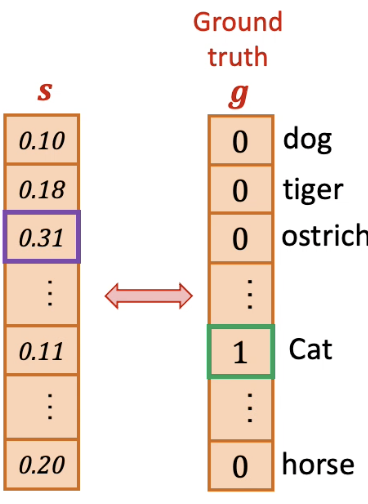


In [ ]:
print('example y class:', y_train[3])
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

print('example one hot encoded y class:', y_train_categorical[3])

print('shape of y_train_categorical:', y_train_categorical.shape)



example y class: 3
example one hot encoded y class: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
shape of y_train_categorical: (60000, 10)


The next two cells are very similar to those from the IntroToDNN notebook. I suggest going through that first if you are unsure about anything.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()
num_features = x_train_flat.shape[1]
model.add(Dense(128, input_dim=num_features, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.0001), metrics=['accuracy'])

history = model.fit(x_train_flat, y_train_categorical, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 2.0132 - accuracy: 0.3889
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4160 - accuracy: 0.5275
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3071 - accuracy: 0.5645
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2502 - accuracy: 0.5856
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2131 - accuracy: 0.5977
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1834 - accuracy: 0.6083
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1581 - accuracy: 0.6144
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1374 - accuracy: 0.6202
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1203 - accuracy: 0.6256
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.103

In [ ]:
loss, accuracy = model.evaluate(x_test_flat, y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 1.1506 - accuracy: 0.6271


Text(0, 0.5, 'loss')

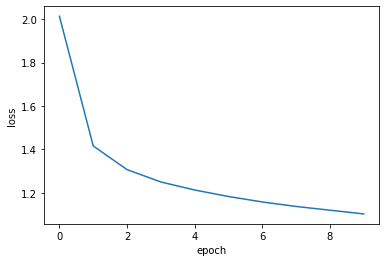

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

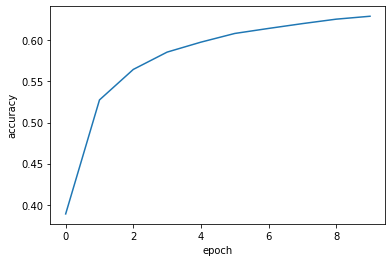

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

# Building a Convolutional Neural Network (CNN)

OK, let's build a Convolutional Neural Network (CNN). The first difference with the steps from building the previous fully connected DNN is that we are importing different types of layers. 

The most important layer is the convolutional ('Conv2D') layer. This is what we will use instead of the Dense layer to process the image using convolutions. As discussed in the lecture, a 2D convolution is able to learn from spatial information in the image. We will talk more about how this works below. 

We will also do a form of pooling, in this case max pooling (MaxPooling2D).  Max pooling is also something mentioned in the lecture. We will talk more about how this works below.

Finally we import a Flatten layer. It's common to attach some fully connected layers after the convolutional layers, which as we know, requires a vector for input. The Flatten layer takes a non-flat input, and produces a flat output. For example, the output of a convolutional layer, or max pooling layer, will be a matrix, while the fully connected neural network we will use after the convolutional layers will expect a vector. This layer will flatten the matrix output from the MaxPooling2D layer into a vector, similarily to how we manually done so with np.reshape in the last notebook.



In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow. keras.layers import Flatten


## Reshaping data for use with a CNN
A CNN represnts images as a 3D tensor, in the form of height $x$ width $x$ channel. 
Height and width are self-explanatory, but the channels may not be. The channel allows the network to deal with the fact that in an image, each pixel may consist of multiple values, for example, an RGB image would have a 3 values for each pixel to encode colour. Therefore, the CNN would have 3 channels for the input image.
If it's a greyscale image (such as those from Fashion MNIST), the CNN only needs one channel, as each pixel is represented by only 1 value instead of 3.

In lines 5 and 6 below, we reshape the data to encode this channel information. 

In [ ]:
height = x_train.shape[1]
width = x_train.shape[2]
channels = 1
print(x_train.shape)
x_train_cnn = x_train.reshape(x_train.shape[0], height, width, channels)
x_test_cnn = x_test.reshape(x_test.shape[0], height, width, channels)

print(x_train_cnn.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


## CNN building blocks


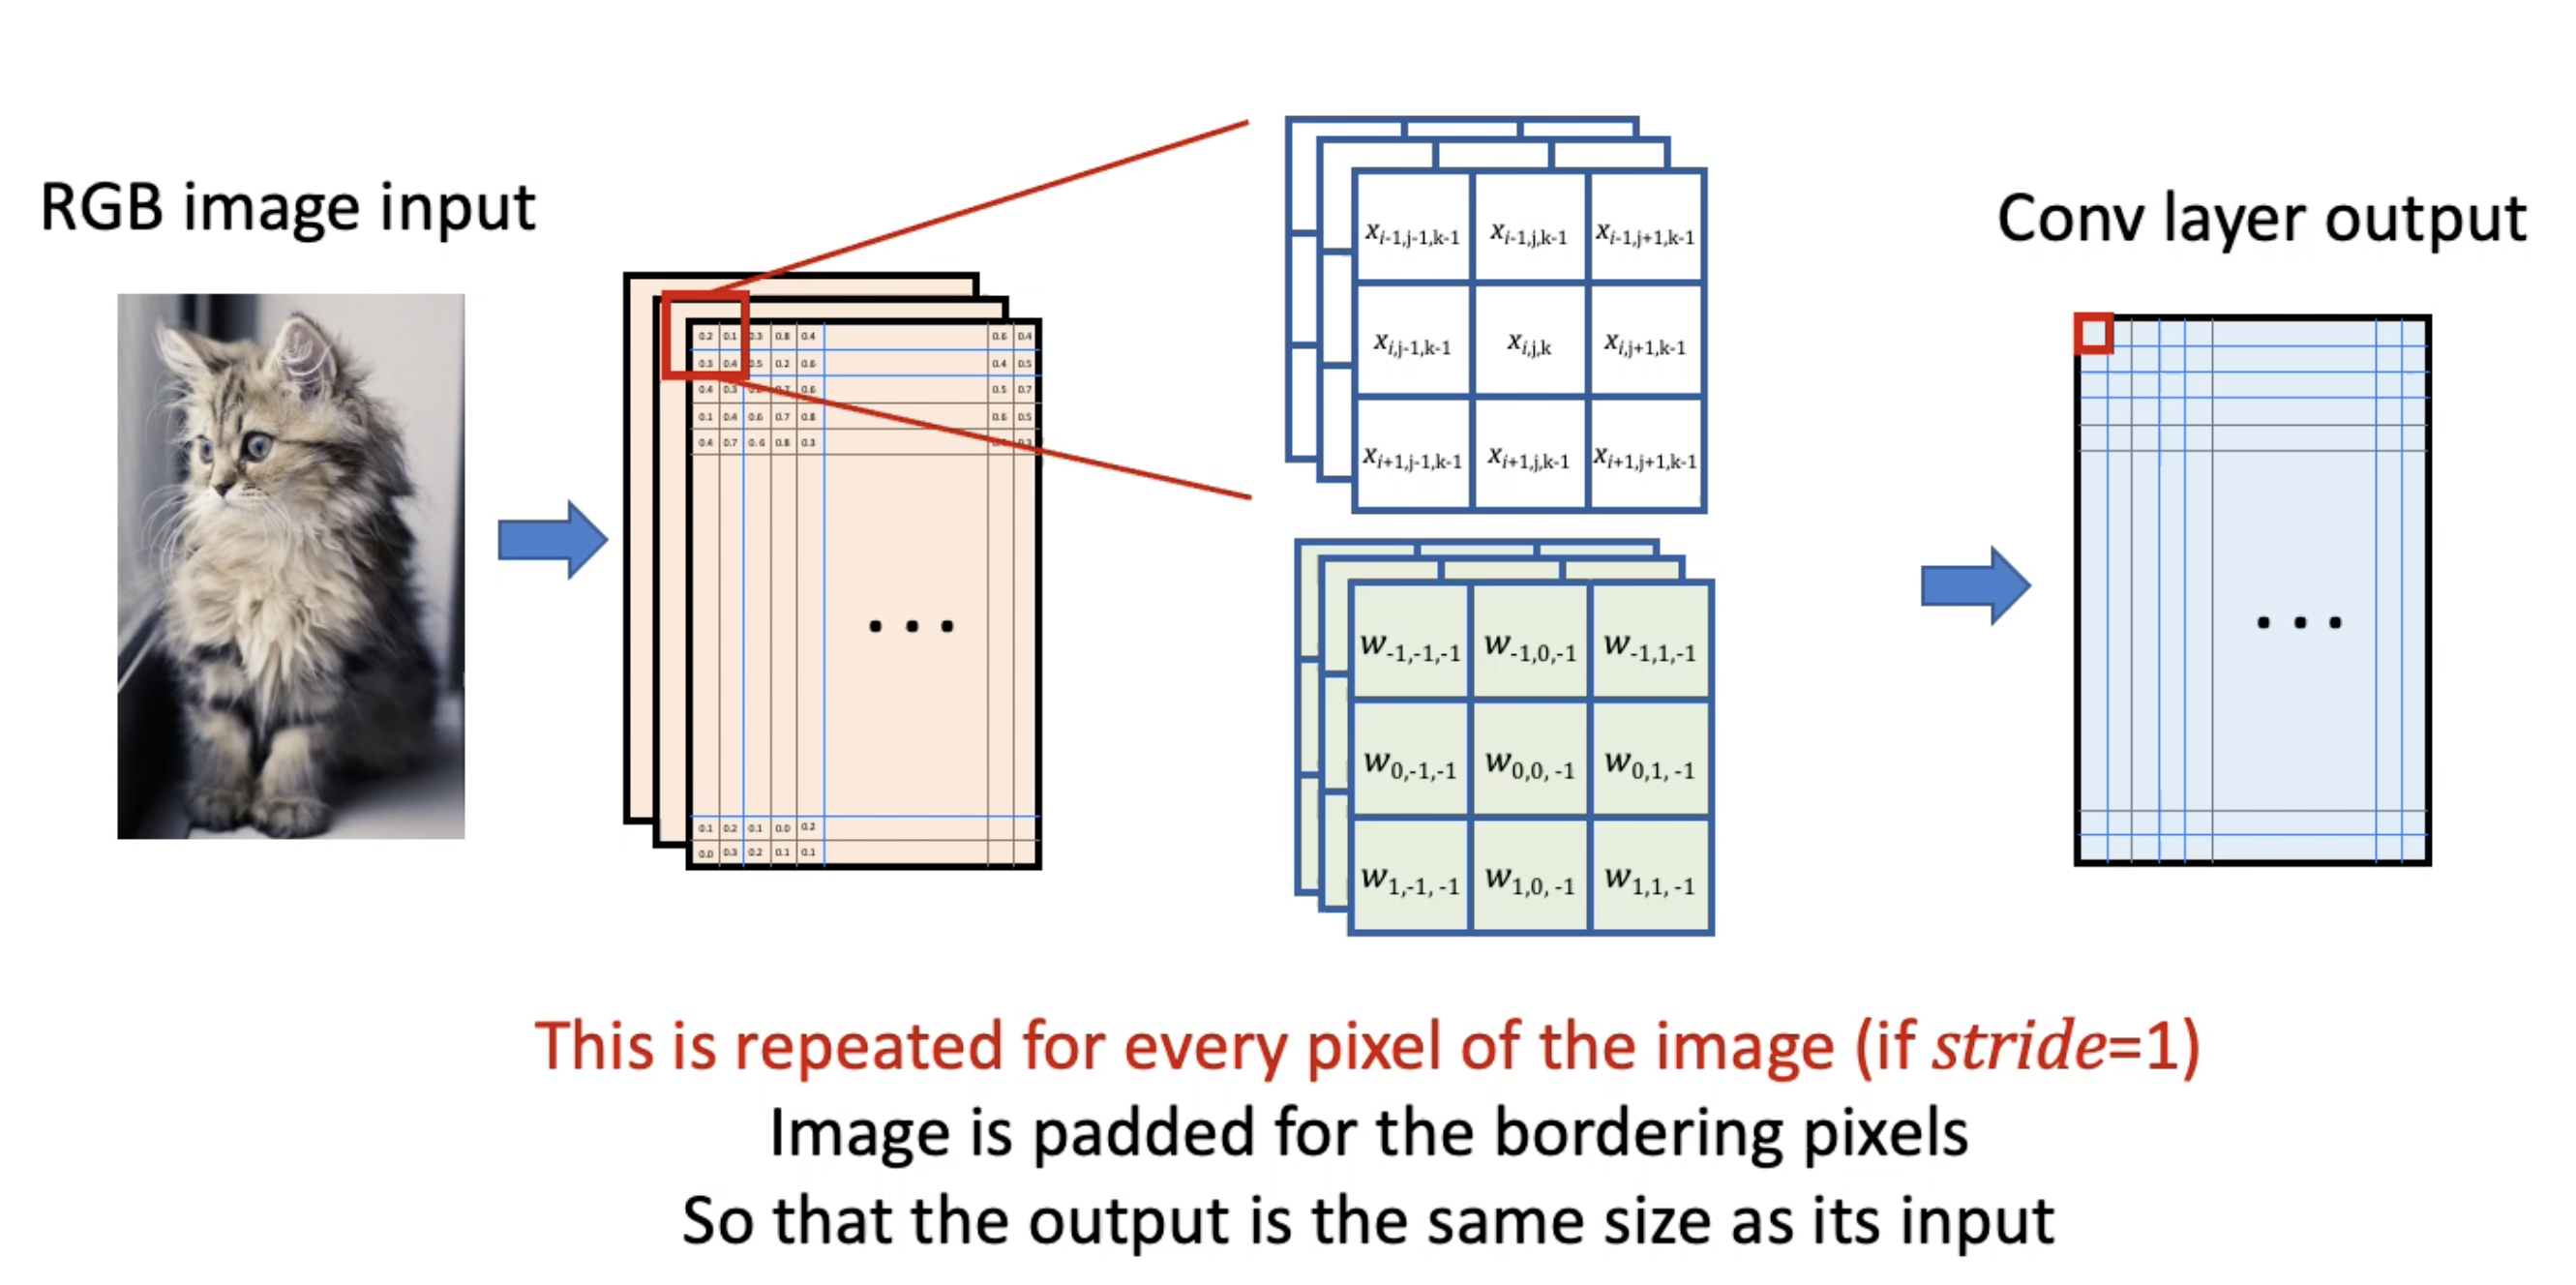









### Filters
In a CNN a filter can be considered analogous to a neuron. Each filter is a set of weights that are learned by training the network using the specified loss function. In the first layer below we specify 32 filters. Each of these filters will convolve (or slide) over the input image, taking the dot product of the values of the filter with those of the window of data the filter can currently see. This operation, if it works, leads to each filter learning features from the input.

We define a second convolutional layer on line 10. In this layer, the input is no longer the image, but rather the output of the layer that proceeds it, which is MaxPooling2D. By adding convolutional layers, the CNN can learn more complex higher level features. For e.g., line features may be learned in earlier layers, while more complex structures and shapes are learned in later layers.

### Kernel Size
The size of each filter is determined by the kernel_size. This specifies the size of the filter that will convolve over the input to the layer. For example a 5$x$5 filter in the first convolutional layer of the network below will convolve over the image, each time taking in 25 pixels. The second convolutional layer has the same kernel size (filter size) and thus will convolve not over the image, but over the output of the layer that precedes it, in this case the MaxPooling2D layer. In most cases, it is common to use a filter size around 3, 5 or 7. Very large filter sizes will not be able to capture more local features. 



### Pooling
Max pooling, as you may recall from the lecture, is where we downsample the input. If the pool size is 2$x$2, it is saying that there will be a 2$x$2 window over the input (which is the output of the convolution), each time taking the max value in that window. 
This is reducing the spatial size of the representation, which leads to a reduction in the amount of parameters in the neural network. This can make sense as, especially in earlier layers, neighbouring pixels may be highly correlated. The purpose of this layer is  to remove redundant information and can help with overfitting.




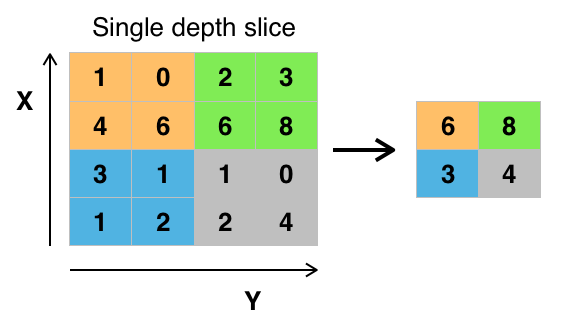 Image source: wikipedia.



### Strides
Strides is the amount by which the filter slides over the input.
In the case of 2$x$2 stride, it involves moving the filter two pixels right for each horizontal movement of the filter and two pixels down for each vertical movement of the filter. If the stride length of 1$x$1, then it would move 1 pixel in each direction.

### A note on CNNs for other data types
Note here we have a 2D CNN since we are working with images. If it was regular vector data it would be 1D CNN. Other 1D data, such as audio signals or text, could also be processed by a 1D CNN. 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(height, width, channels)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
"""
one common approach is to add more filters as we add more layers.. the idea being that the early layers 'learn' 
more specific features such as edges in an image while later layers learn more specific features.. 
while early layers may learn to detect lines, later filters may learn to detect sleeves of a shirt, or heels of a shoe
"""
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
"""
once we finish convolutions, we need to squish or non 1D output into something a 
fully connected neural network can process.
you can think of the convolution layers as learning image features, while the fully connected
layer below is performing classification using them.
"""
model.add(Flatten())
"""
now that we have squished, or flattened it, we can either just add one more layer that we want to be our 
predicted class probablities, or we can add some more dense (for e.g.) layers first..
the final dense layer will be our output layer, producing probablities that the image belongs to each class
"""
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.0001), metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train_categorical, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 7ms/step - loss: 0.8007 - accuracy: 0.7516
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5076 - accuracy: 0.8244
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4472 - accuracy: 0.8449
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4123 - accuracy: 0.8553
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3892 - accuracy: 0.8646
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3704 - accuracy: 0.8715
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3551 - accuracy: 0.8756
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3427 - accuracy: 0.8804
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3317 - accuracy: 0.8831
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

In [ ]:
loss, accuracy = model.evaluate(x_test_cnn, y_test_categorical)

313/313 [==============================] - 2s 4ms/step - loss: 0.3718 - accuracy: 0.8714


Text(0, 0.5, 'loss')

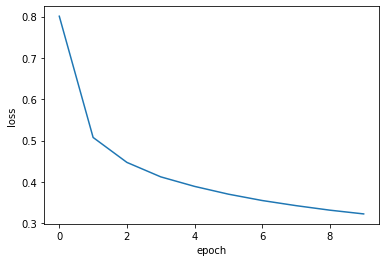

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

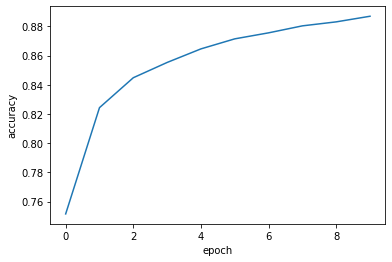

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')